In [205]:
import sys
import numpy as np
import pandas as pd
import random, math
import os
from os import path
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import networkx as nx
import PIL
import igraph as ig

In [206]:
def leer_matriz(path_instancia):
    file = open(path_instancia, "r")
    Lines = file.readlines()
    header = [int(Lines[0]), int(Lines[1])]
    Lines = Lines[2:]
    
    relaciones = []
    
    for line in Lines:
        line_data = line.split()
        relaciones.append([int(line_data[0]), int(line_data[1])])
        
    return([header, relaciones])

def leer_resultado(path_instancia):
    file = open(path_instancia, "r")
    Lines = file.readlines()
    
    header = float(Lines[0])
    
    Lines = Lines[1:]
    
    resultados = []
    
    for line in Lines:
        resultados.append(float(line))
        
    return([header, resultados])

In [207]:
def calcular_A(archivo_entrada, p_valor):
    data = leer_matriz(archivo_entrada)
    header = data[0]
    body = data[1]
    
    M = header[0] # Filas y Columnas de matriz
    N = header[1] # Relaciones
    W = np.zeros((M, M), dtype=float)
    
    for rel in body:
        W[rel[1]-1][rel[0]-1] = 1
        
    D = np.zeros((M, M), dtype=float)
    C = np.zeros(M, dtype=float)
    Z = np.zeros(M, dtype=float)
    E = np.ones(M, dtype=float)
    I = np.identity(M)
    
    for j in range(0, M):
        zeroes = 0
        for i in range(0, M):
            if W[i][j] == 1:
                zeroes = zeroes + 1
        C[j] = zeroes

    for i in range(0, M):
        if C[i] != 0:
            D[i][i] = float(1/C[i])

    p = p_valor

    for i in range(0, M):
        if C[i] != 0:
            Z[i] = (float((1 - p) / M))
        else:
            Z[i] = (float((1) / M))

    WD = np.matmul(W, D)
    WDp = p*WD
    # Hasta aca todo bien, falta ver el EZ
    
    E = np.array(E)[np.newaxis]
    EZt = E.T * Z
    A = WDp + EZt
    
    return A

In [208]:
A_matriz = calcular_A("./tests/instancias/test_15_segundos.txt", 0.9)

In [209]:
x= leer_resultado("./tests/resultados_catedra/test_15_segundos.txt.out")
x_vector = np.array(x[1])

In [210]:
Ax = A_matriz.dot(x_vector)

In [211]:
Ax_x = Ax - x_vector

### Numero de condicion basado en la formula de la teorica y la norma de frobenius

In [264]:
A_inverse = np.linalg.inv(A_matriz) # Busco la inversa de la matriz
A_norm = np.linalg.norm(A_matriz) # Busco la norma de A
A_inverse_norm = np.linalg.norm(A_inverse) # Busco la norma de A^-1
condition_number = np.multiply(A_norm, A_inverse_norm) # Hago el producto de ambos resultados
print(condition_number)

3.333147398979831e+49


In [292]:
A = np.zeros((3, 3), dtype=float)
A_inv = []
A[0][0] = 1
A[1][1] = 4
A[2][2] = 4
if np.linalg.det(A) != 0:
    A_inv = np.linalg.inv(A)
print(A_inv)

[[1.   0.   0.  ]
 [0.   0.25 0.  ]
 [0.   0.   0.25]]


### Metodo de python para calcular el numero de condicion

In [296]:
np.linalg.cond(A_matriz, None) # 2-norm, computed directly using the SVD

2.3803746296773345e+18

In [297]:
np.linalg.cond(A_matriz, 2) # 2-norm (largest sing. value)

2.3803746296773345e+18

In [259]:
np.linalg.cond(A_matriz, 1) # max(sum(abs(x), axis=0))

1.824475680917364e+48

In [260]:
np.linalg.cond(A_matriz, -2) # smallest singular value

4.201019400612384e-19

In [261]:
np.linalg.cond(A_matriz, -1) # min(sum(abs(x), axis=0))

37526784115019.75

In [202]:
np.linalg.norm(Ax_x)

2.6814167816281186e-08

In [10]:
e = np.matrix([1, 1, 1, 1, 1])
z = np.matrix([0.48, 0.2, 0.48, 0.48, 0.48])
print(e)
print(z.T)
np.dot(z.T, e)

[[1 1 1 1 1]]
[[0.48]
 [0.2 ]
 [0.48]
 [0.48]
 [0.48]]


matrix([[0.48, 0.48, 0.48, 0.48, 0.48],
        [0.2 , 0.2 , 0.2 , 0.2 , 0.2 ],
        [0.48, 0.48, 0.48, 0.48, 0.48],
        [0.48, 0.48, 0.48, 0.48, 0.48],
        [0.48, 0.48, 0.48, 0.48, 0.48]])

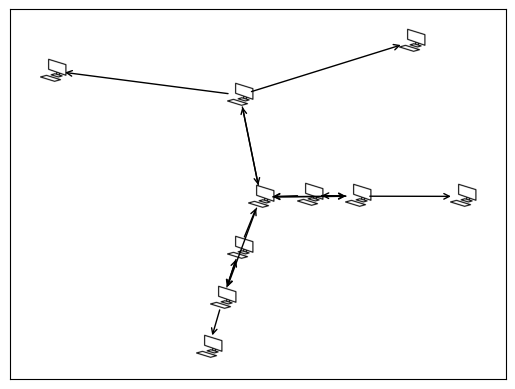

In [194]:
seed = random.randint(1, 100000)  # Seed random number generators for reproducibility

icons = {
    "router": "./icons/computer.png",
    "switch": "./icons/computer.png",
    "PC": "./icons/computer.png",
}

# Generate the computer network graph
G = nx.DiGraph()

G.add_node("router", image=images["router"])
for i in range(1, 4):
    G.add_node(f"switch_{i}", image=images["switch"])
    for j in range(1, 3):
        G.add_node("PC_" + str(i) + "_" + str(j), image=images["PC"])

G.add_edge("router", "switch_1")
G.add_edge("router", "switch_2")
G.add_edge("router", "switch_3")

for u in range(1, 4):
    for v in range(1, 3):
        G.add_edge("switch_" + str(u), "PC_" + str(u) + "_" + str(v))
        nodo_AB = random.uniform(0, 1)
        if nodo_AB > 0.5:
            G.add_edge("PC_" + str(u) + "_" + str(v),"switch_" + str(u))
    
G.add_edge("switch_3", "router")
G.add_edge("switch_1", "router")

for u in range(1, 4):
    nodo_AB = random.uniform(0, 1)
    if nodo_AB > 0.5:
        G.add_edge("PC_" + str(u) + "_" + str(v),"router")

# Get a reproducible layout and create figure
pos = nx.spring_layout(G)
fig, ax = plt.subplots()

# Note: the min_source/target_margin kwargs only work with FancyArrowPatch objects.
# Force the use of FancyArrowPatch for edge drawing by setting `arrows=True`,
# but suppress arrowheads with `arrowstyle="-"`
nx.draw_networkx_edges(
    G,
    pos=pos,
    ax=ax,
    arrows=True,
    arrowstyle="->",
)

# Transform from data coordinates (scaled between xlim and ylim) to display coordinates
tr_figure = ax.transData.transform
# Transform from display to figure coordinates
tr_axes = fig.transFigure.inverted().transform

# Select the size of the image (relative to the X axis)
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.025
icon_center = icon_size / 2.0

# Add the respective image to each node
for n in G.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
    # get overlapped axes and plot icon
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    a.axis("off")

plt.savefig("graficos/union-paginas.svg");
plt.show()

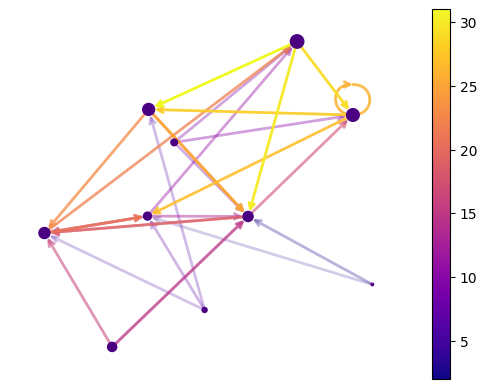

In [191]:
# PRUEBA DE DIGRAFO
seed = 13648  # Seed random number generators for reproducibility
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax=ax)
plt.show()